#Recipe 40 - Arbitrary Interval Discrretization

In [120]:
import numpy as np
import pandas as pd
import seaborn as sns

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split


In [121]:
# boston.csv in local file 
data = pd.read_csv('boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Arbitrary interval width discretization with pandas

First we need to determine the interval edges or limits.

<AxesSubplot:>

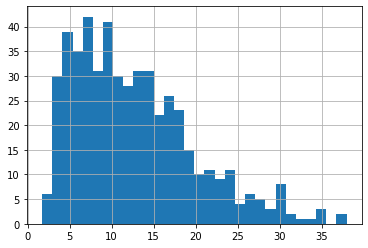

In [122]:
# let's plot a histogram to understand the value range of 
#the variable LSTAT

data['LSTAT'].hist(bins=30)

In [123]:
# bin boundaries - we will use with pandas cut()
intervals = [0, 10, 20, 30, np.Inf]

# bin labels - we will use with pandas cut()
labels = ['0-10', '10-20', '20-30', '>30']

In [124]:
# discretize LSTAT

# create a discretized version of the variable where the values are the
# strings we created in the previous cell
data['lstat_labels'] = pd.cut(
    data['LSTAT'], bins=intervals, labels=labels, include_lowest=True)

# let's create a version of the discretized variable were the values are
# the interval limits
data['lstat_intervals'] = pd.cut(
    data['LSTAT'], bins=intervals, labels=None, include_lowest=True)

# plot the original and 2 versions of the discretized variable
print(data[['LSTAT', 'lstat_labels', 'lstat_intervals']].head())

   LSTAT lstat_labels lstat_intervals
0   4.98         0-10  (-0.001, 10.0]
1   9.14         0-10  (-0.001, 10.0]
2   4.03         0-10  (-0.001, 10.0]
3   2.94         0-10  (-0.001, 10.0]
4   5.33         0-10  (-0.001, 10.0]


In [125]:
# let's check the number of observations per bin

data['lstat_intervals'].value_counts()

(-0.001, 10.0]    219
(10.0, 20.0]      213
(20.0, 30.0]       62
(30.0, inf]        12
Name: lstat_intervals, dtype: int64

## Recipe 41 - KMeans Discretizer

In [126]:
from sklearn.preprocessing import KBinsDiscretizer

In [127]:
# boston.csv in local file 
data = pd.read_csv('boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [128]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

## K-means discretization with Scikit-Learn

In [129]:
# set up a k-means discretizer
disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')

# fit the discretizer to the train set so that it learns the 
# interval boundaries
disc.fit(X_train[['LSTAT', 'DIS', 'RM']])

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='kmeans')

In [130]:
# we can inspect the bin boundaries here:

disc.bin_edges_

array([array([ 1.73      ,  5.45330009,  8.65519753, 12.03266667, 15.46755102,
              18.89709647, 22.15778075, 25.54037815, 28.75339286, 32.6525    ,
              36.98      ])                                                   ,
       array([ 1.1742    ,  2.26301884,  3.30153104,  4.48057886,  5.60712611,
               6.6482802 ,  7.56131797,  8.45406587,  9.7820881 , 11.37686667,
              12.1265    ])                                                   ,
       array([3.561     , 3.987125  , 4.73948864, 5.32155682, 5.77285276,
              6.14207435, 6.503811  , 6.91447956, 7.43717157, 8.1095049 ,
              8.78      ])                                               ],
      dtype=object)

In [131]:
# let's transform the train set, remember that it returns a NumPy array
train_t = disc.transform(X_train[['LSTAT', 'DIS', 'RM']])

# let's transform the array to a dataframe
train_t = pd.DataFrame(train_t, columns = ['LSTAT', 'DIS', 'RM'])

print(train_t.head())

   LSTAT  DIS   RM
0    9.0  0.0  2.0
1    1.0  2.0  6.0
2    4.0  0.0  5.0
3    0.0  6.0  5.0
4    4.0  0.0  4.0


In [132]:
# let's do the same for the test set

test_t = disc.transform(X_test[['LSTAT', 'DIS', 'RM']])

test_t = pd.DataFrame(test_t, columns = ['LSTAT', 'DIS', 'RM'])

Text(0, 0.5, 'Number of observations per bin')

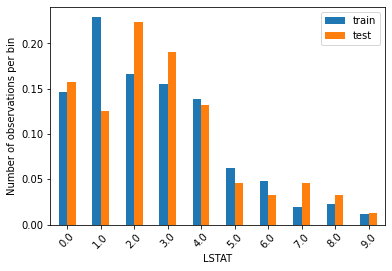

In [133]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

# LSTAT

t1 = train_t.groupby(['LSTAT'])['LSTAT'].count() / len(train_t)
t2 = test_t.groupby(['LSTAT'])['LSTAT'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

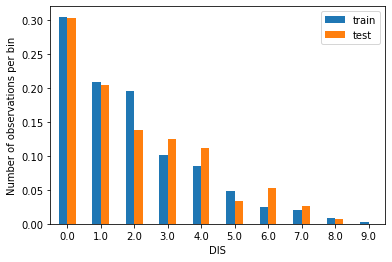

In [134]:
# DIS

t1 = train_t.groupby(['DIS'])['DIS'].count() / len(train_t)
t2 = test_t.groupby(['DIS'])['DIS'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

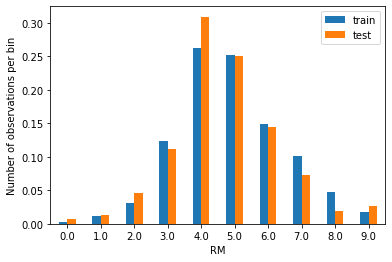

In [135]:
# RM

t1 = train_t.groupby(['RM'])['RM'].count() / len(train_t)
t2 = test_t.groupby(['RM'])['RM'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

## Recipe 42 - Decision tree Discrtizer 

In [136]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import GridSearchCV

In [137]:
# boston.csv in local file 
data = pd.read_csv('boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [138]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

## Dtreeviz

c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


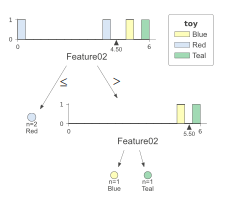

In [139]:
import pandas as pd
from sklearn import preprocessing, tree
from dtreeviz.trees import dtreeviz

Things = {'Feature01': [3,4,5,0], 
          'Feature02': [4,5,6,0], 
          'Feature03': [1,2,3,8], 
          'Target01': ['Red','Blue','Teal','Red']}
df = pd.DataFrame(Things,
                  columns= ['Feature01', 'Feature02', 
                            'Feature02', 'Target01']) 

label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df.Target01)
df['target'] = label_encoder.transform(df.Target01)

classifier = tree.DecisionTreeClassifier()
classifier.fit(df.iloc[:,:3], df.target)

dtreeviz(classifier,
         df.iloc[:,:3],
         df.target,
         target_name='toy',
         feature_names=df.columns[0:3],
         class_names=list(label_encoder.classes_)
         )

# enter image description here

## Discretization using Decision Trees

In [140]:
# example: build Regression tree using LSTAT to predict MEDV

tree_model = DecisionTreeRegressor(max_depth=3, random_state=0)

tree_model.fit(X_train['LSTAT'].to_frame(), y_train)

X_train['lstat_tree'] = tree_model.predict(X_train['LSTAT'].to_frame())

X_train[['LSTAT', 'lstat_tree']].head(10)

,LSTAT,lstat_tree
141,34.41,12.917241
272,7.73,27.153846
135,16.96,16.361818
298,4.97,32.042857
122,17.93,16.361818
22,18.72,16.361818
68,13.09,20.555000
20,21.02,12.917241
437,26.45,12.917241
14,10.26,20.555000


In [141]:
# let's explore how many end points (the bins) the tree created

X_train['lstat_tree'].nunique()

8

In [142]:
# let's explore which end points (the predictions) the tree created

X_train['lstat_tree'].unique()

array([12.91724138, 27.15384615, 16.36181818, 32.04285714, 20.555     ,
       34.88333333, 23.71388889, 41.80740741])

Text(0, 0.5, 'MEDV')

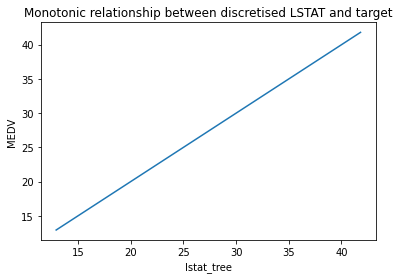

In [143]:
# monotonic relationship with target: train set

pd.concat([X_train, y_train], axis=1).groupby(['lstat_tree'])['MEDV'].mean().plot()
plt.title('Monotonic relationship between discretised LSTAT and target')
plt.ylabel('MEDV')

Text(0, 0.5, 'MEDV')

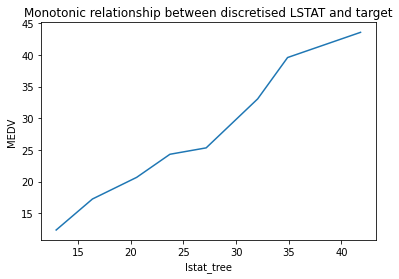

In [144]:
# monotonic relationship with target: test set

X_test['lstat_tree'] = tree_model.predict(X_test['LSTAT'].to_frame())

pd.concat([X_test, y_test], axis=1).groupby(['lstat_tree'])['MEDV'].mean().plot()
plt.title('Monotonic relationship between discretised LSTAT and target')
plt.ylabel('MEDV')

<AxesSubplot:xlabel='lstat_tree'>

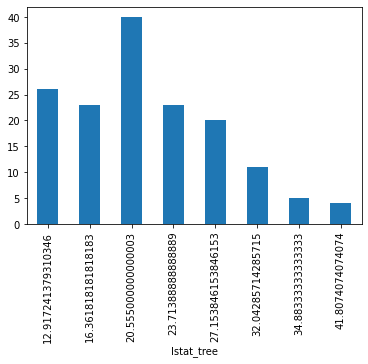

In [145]:
# plot number of observations per bin

X_test.groupby(['lstat_tree'])['LSTAT'].count().plot.bar()

In [146]:
# we can go ahead and visualise the tree by saving the model to a file,

with open("tree_model.txt", "w") as f:
    f = export_graphviz(tree_model, out_file=f)
    
# Alternate option - export in  ".dot" format
# with open("tree_model_dot.dot", "w") as f:
#    export_graphviz(tree_model, out_file=f)


# and opening that file in the below indicated link:

# go here to open the file: http://webgraphviz.com

# generate the png file with the followng command in powershell
# dot -Tpng -Gdpi=300 file_name_written_to -o png_file_name

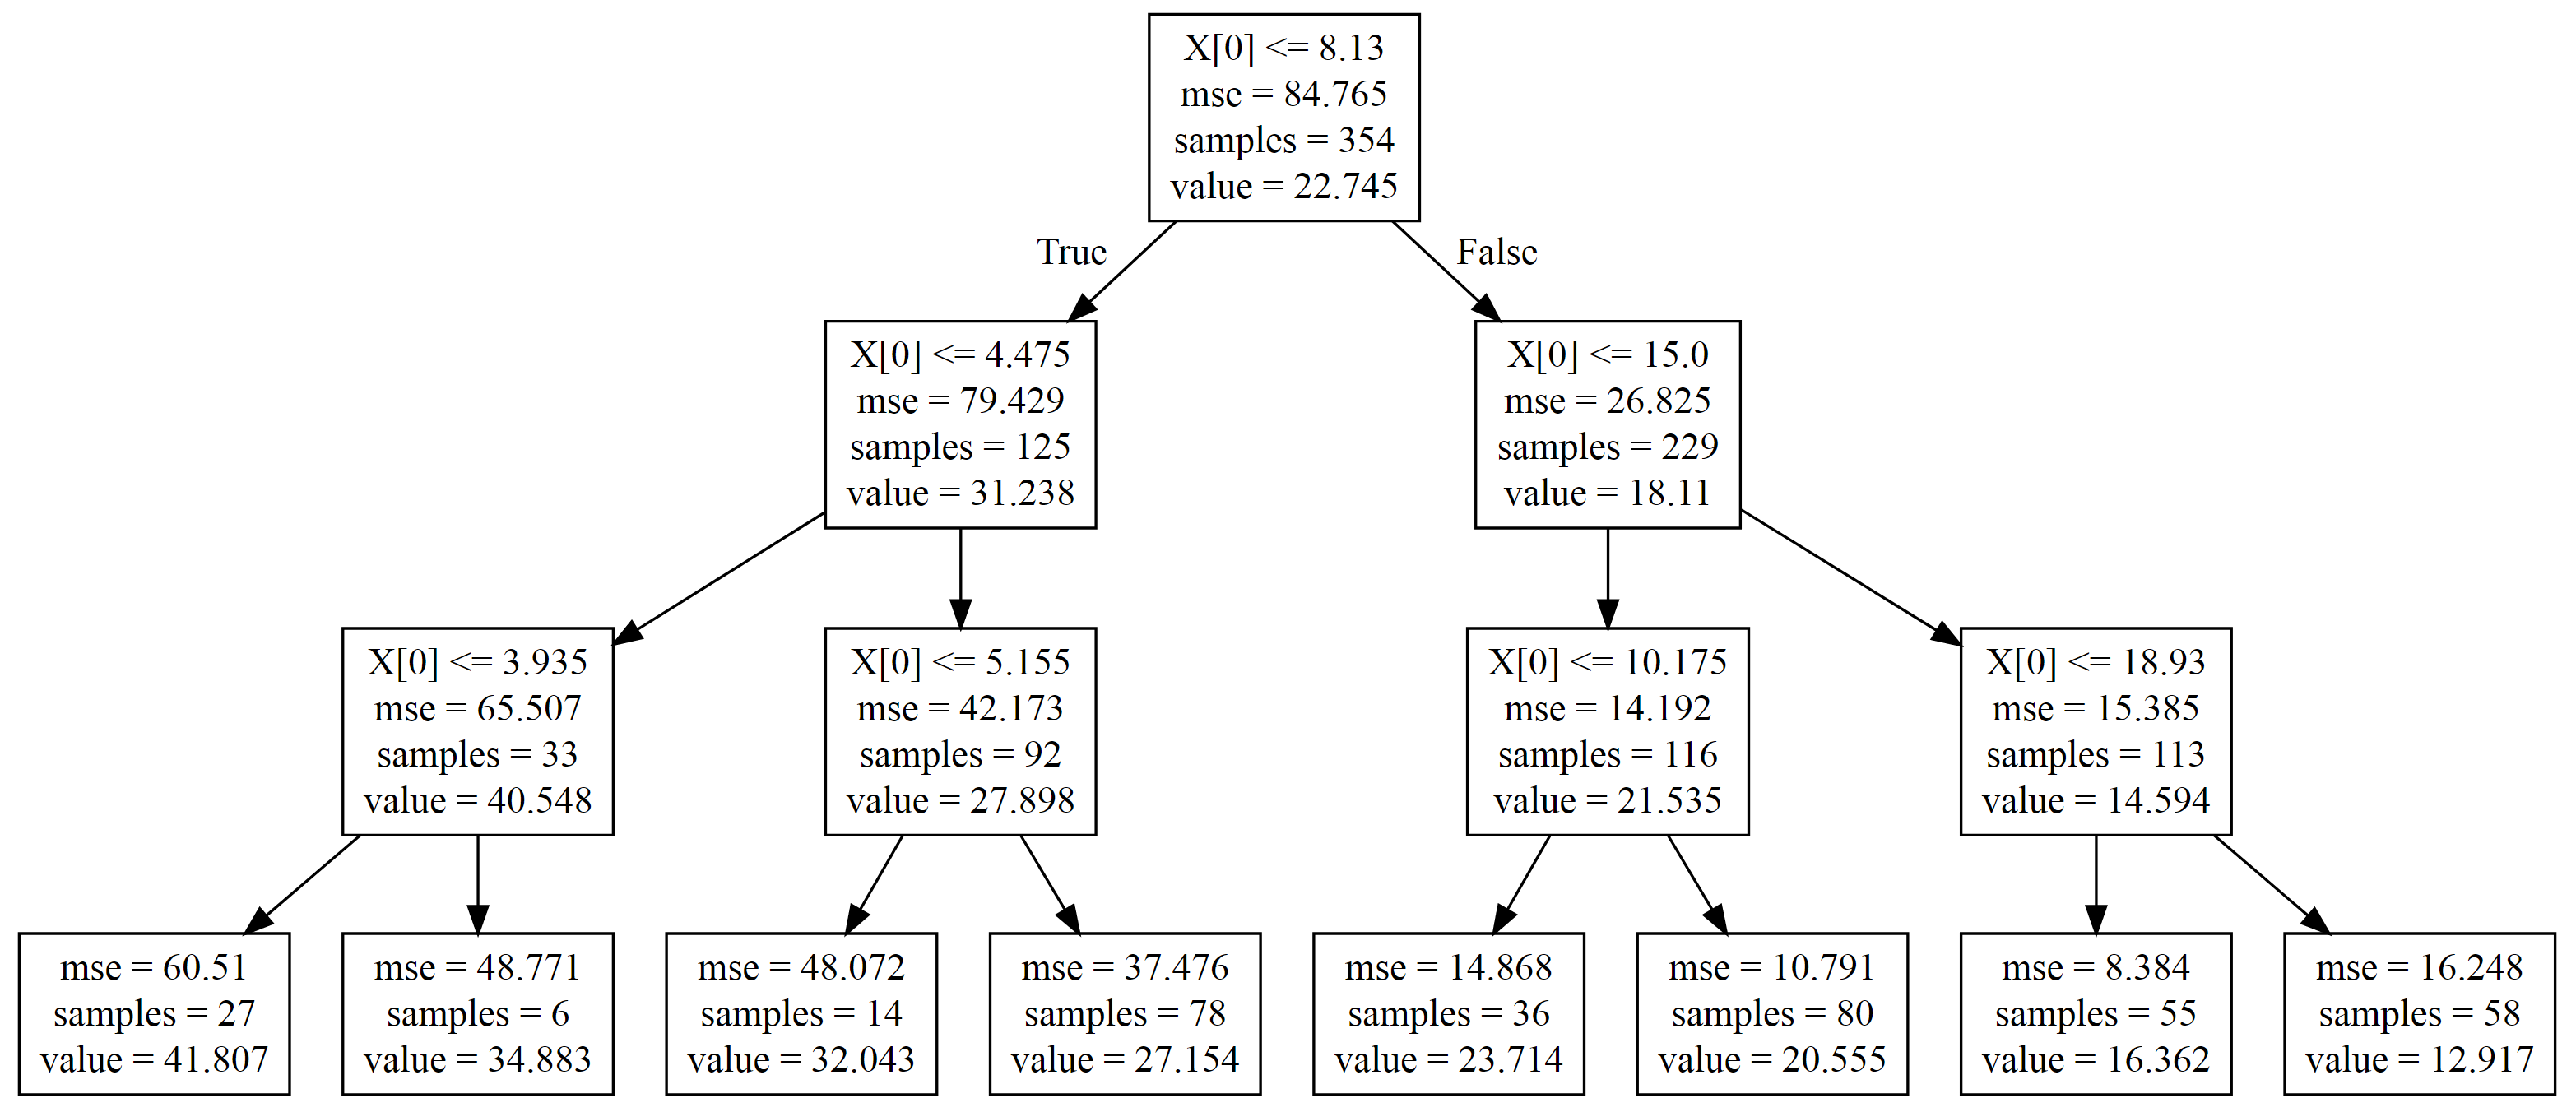

In [147]:
# this is what you should see if you do what is described in the previous cell

# I saved the image you should retrieve in the server above into a png, and then load
# it here to smooth the demo

# the  plot indicates  the age cut-offs at each node, and also the number of samples at each node, and 
# the mse

from IPython.display import Image
from IPython.core.display import HTML 
# PATH = "tree_dot.png"
PATH = "tree_model.png"
Image(filename = PATH , width=1000, height=1000)

## Decision Tree with hyper-parameter tunning

In [148]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [149]:
param_grid = {'max_depth': [1,2,3,4]}

In [150]:
# set up model within GridSearch with the parameters to optimize
# the metric to optimize and the fold cross-validation

tree_model = GridSearchCV(DecisionTreeRegressor(random_state=0),
                          cv = 5, 
                          scoring = 'neg_mean_squared_error',
                          param_grid = param_grid)

In [151]:
# fit the grid - finds tree with optimal parameters for LSTAT

tree_model.fit(X_train['LSTAT'].to_frame(), y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4]},
             scoring='neg_mean_squared_error')

In [152]:
# find predictions / discretize the variable

X_train['lstat_tree'] = tree_model.predict(X_train['LSTAT'].to_frame())
X_test['lstat_tree'] = tree_model.predict(X_test['LSTAT'].to_frame())

## Decision Tree discretization with Feature-engine

In [153]:
from feature_engine.discretisation import DecisionTreeDiscretiser


In [154]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [155]:
# set up the decision tree discretiser indicating:
# cross-validation number (cv)
# how to evaluate model performance (scoring)
# the variables we want to discretise (variables)
# whether it is a target for regression or classification
# and the grid with the parameters we want to test

treeDisc = DecisionTreeDiscretiser(cv=10, scoring='neg_mean_squared_error',
                                   variables=['LSTAT', 'RM', 'DIS'],
                                   regression=True,
                                   param_grid={'max_depth': [1,2,3,4]})

treeDisc.fit(X_train, y_train)

DecisionTreeDiscretiser(cv=10, param_grid={'max_depth': [1, 2, 3, 4]},
                        variables=['LSTAT', 'RM', 'DIS'])

In [156]:
# we can inspect the best parameters found for the tree for LSTAT

treeDisc.binner_dict_['LSTAT'].best_params_

{'max_depth': 3}

In [157]:
# and the parameters for each tree here:

treeDisc.binner_dict_

{'LSTAT': GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
              param_grid={'max_depth': [1, 2, 3, 4]},
              scoring='neg_mean_squared_error'),
 'RM': GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
              param_grid={'max_depth': [1, 2, 3, 4]},
              scoring='neg_mean_squared_error'),
 'DIS': GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
              param_grid={'max_depth': [1, 2, 3, 4]},
              scoring='neg_mean_squared_error')}

In [158]:
# the scores for the tree here
treeDisc.scores_dict_['LSTAT']

-23.515900045418213

In [159]:
# let's transform the data

train_t = treeDisc.transform(X_train)
test_t = treeDisc.transform(X_test)

Text(0, 0.5, 'Number of observations per bin')

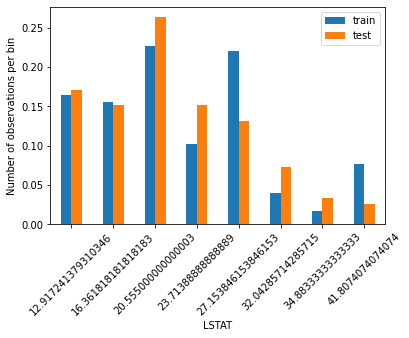

In [160]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set
# let's see that below

t1 = train_t.groupby(['LSTAT'])['LSTAT'].count() / len(train_t)
t2 = test_t.groupby(['LSTAT'])['LSTAT'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'MEDV')

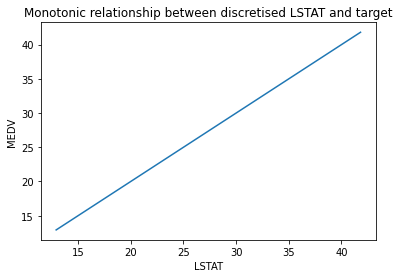

In [161]:
# let's explore the monotonic relationship
pd.concat([train_t, y_train], axis=1).groupby(['LSTAT'])['MEDV'].mean().plot()
plt.title('Monotonic relationship between discretised LSTAT and target')
plt.ylabel('MEDV')

Text(0, 0.5, 'MEDV')

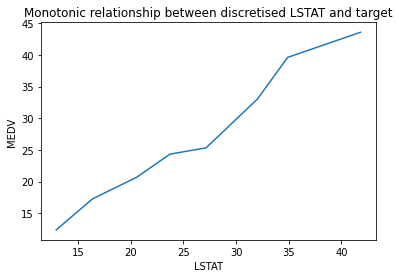

In [162]:
# let's explore the monotonic relationship
pd.concat([test_t, y_test], axis=1).groupby(['LSTAT'])['MEDV'].mean().plot()
plt.title('Monotonic relationship between discretised LSTAT and target')
plt.ylabel('MEDV')

Text(0, 0.5, 'Number of observations per bin')

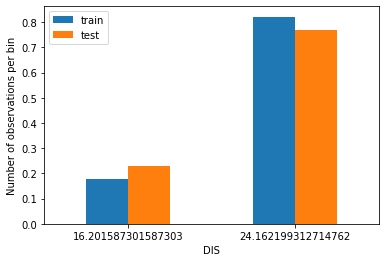

In [163]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set
# let's see that below

#LSTAT

t1 = train_t.groupby(['DIS'])['DIS'].count() / len(train_t)
t2 = test_t.groupby(['DIS'])['DIS'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

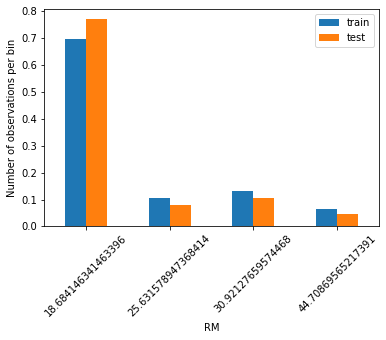

In [164]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set
# let's see that below

#RM

t1 = train_t.groupby(['RM'])['RM'].count() / len(train_t)
t2 = test_t.groupby(['RM'])['RM'].count() / len(test_t)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')

## Recipe43 - Outlier  trimming

In [165]:
# boston.csv in local file 
boston = pd.read_csv('boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<AxesSubplot:ylabel='RM'>

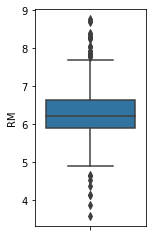

In [166]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=boston['RM'])

In [167]:
def find_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [168]:
# find limits for RM

RM_upper_limit, RM_lower_limit = find_boundaries(boston, 'RM', 1.5)
RM_upper_limit, RM_lower_limit

(7.730500000000001, 4.778499999999999)

In [169]:
# limits for LSTAT

LSTAT_upper_limit, LSTAT_lower_limit = find_boundaries(boston, 'LSTAT', 1.5)
LSTAT_upper_limit, LSTAT_lower_limit

(31.962500000000006, -8.057500000000005)

In [170]:
# limits for CRIM

CRIM_upper_limit, CRIM_lower_limit = find_boundaries(boston, 'CRIM', 1.5)
CRIM_upper_limit, CRIM_lower_limit

(9.06963875, -5.31051125)

In [171]:
# let's flag the outliers in the data set

outliers_RM = np.where(boston['RM'] > RM_upper_limit, True,
                       np.where(boston['RM'] < RM_lower_limit, True, False))

In [172]:
# let's flag the outliers in the data set

outliers_LSTAT = np.where(boston['LSTAT'] > LSTAT_upper_limit, True,
                       np.where(boston['LSTAT'] < LSTAT_lower_limit, True, False))

In [173]:
# let's flag the outliers in the data set

outliers_CRIM = np.where(boston['CRIM'] > CRIM_upper_limit, True,
                       np.where(boston['CRIM'] < CRIM_lower_limit, True, False))

In [174]:
# let's trimm the dataset only of outliers in RM

boston_trimmed = boston.loc[~outliers_RM ]

boston.shape, boston_trimmed.shape

((506, 14), (476, 14))

<AxesSubplot:ylabel='RM'>

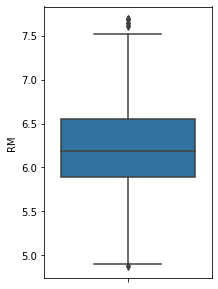

In [175]:
plt.figure(figsize=(3, 5))
sns.boxplot(y=boston_trimmed['RM'])

In [176]:
# let's trimm the dataset of outliers across multiple variables

boston_trimmed = boston.loc[~(outliers_RM + outliers_LSTAT + outliers_CRIM), ]

boston.shape, boston_trimmed.shape

((506, 14), (416, 14))

In [177]:
# let's trimm the dataset of outliers across multiple variables

boston_trimmed = boston.loc[~(outliers_RM + outliers_LSTAT + outliers_CRIM), ]

boston.shape, boston_trimmed.shape

((506, 14), (416, 14))

<AxesSubplot:ylabel='RM'>

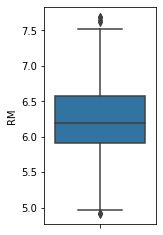

In [178]:
plt.figure(figsize=(2, 4))
sns.boxplot(y=boston_trimmed['RM'])

## There is more section

In [179]:
def find_boundaries(df, variable, distance):
    lower_boundary = df[variable].mean() - (df[variable].std() * distance)
    upper_boundary = df[variable].mean() + (df[variable].std() * distance)
    return upper_boundary, lower_boundary

In [180]:
RM_upper_limit, RM_lower_limit = find_boundaries(boston, 'RM', 3)
RM_upper_limit, RM_lower_limit

(8.392485817597748, 4.176782957105809)

In [181]:
def find_boundaries(df, variable):
    lower_boundary = df[variable].quantile(0.05)
    upper_boundary = df[variable].quantile(0.95)
    return upper_boundary, lower_boundary

In [182]:
RM_upper_limit, RM_lower_limit = find_boundaries(boston, 'RM')
RM_upper_limit, RM_lower_limit

(7.5875, 5.314)

# Recipe44 Winsorization

In [183]:
from feature_engine.outliers import Winsorizer

In [184]:
# boston.csv in local file 
boston = pd.read_csv('boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [187]:
# function to create histogram, Q-Q plot and
# boxplot. We learned this in section 3 of the course


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('RM quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    
    plt.show()



c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


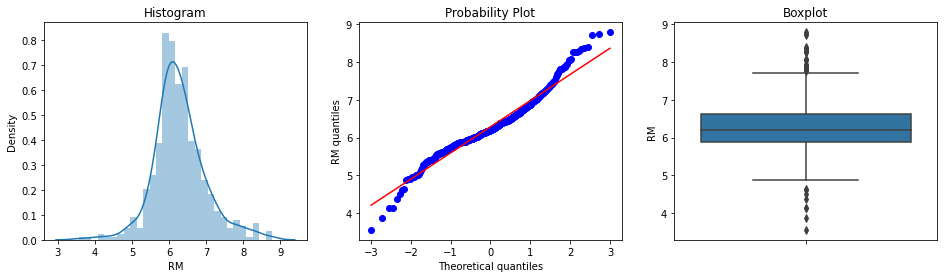

In [188]:
# let's find outliers in RM

diagnostic_plots(boston, 'RM')

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


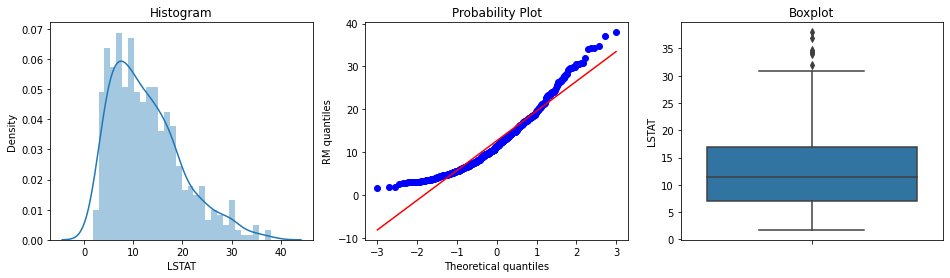

In [189]:
# visualise outliers in LSTAT

diagnostic_plots(boston, 'LSTAT')

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


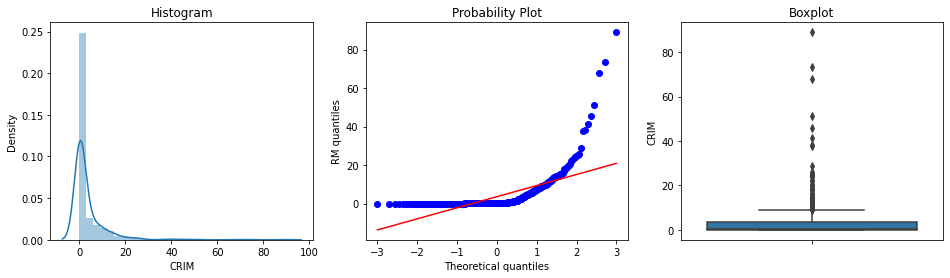

In [190]:
# outliers in CRIM

diagnostic_plots(boston, 'CRIM')

In [191]:
def winsorise(df, variable, upper_limit, lower_limit):
    return np.where(df[variable] > upper_limit, upper_limit, 
                    np.where(df[variable] < lower_limit, lower_limit, df[variable]))

In [192]:
# Now let's replace the outliers by the percentiles

boston['RM']= winsorise(boston, 'RM', boston['RM'].quantile(0.95), boston['RM'].quantile(0.05))

In [193]:
boston['LSTAT']= winsorise(boston, 'LSTAT', boston['LSTAT'].quantile(0.95), boston['LSTAT'].quantile(0.05))

In [194]:
boston['CRIM']= winsorise(boston, 'CRIM', boston['CRIM'].quantile(0.95), boston['CRIM'].quantile(0.05))

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


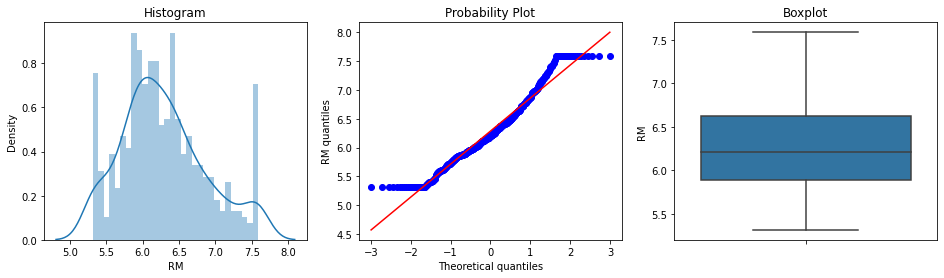

In [195]:
# let's explore outliers in the trimmed dataset
# for RM we see much less outliers as in the original dataset

diagnostic_plots(boston, 'RM')

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


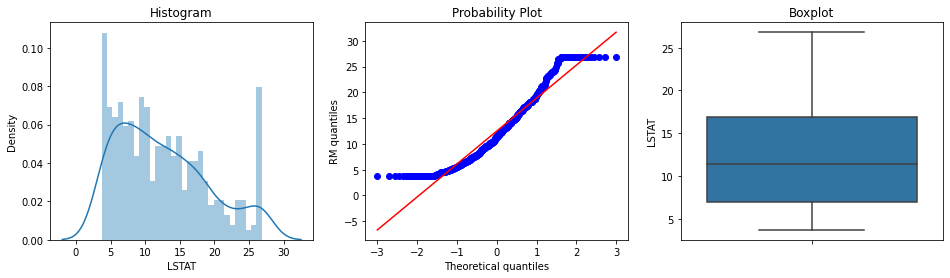

In [196]:
diagnostic_plots(boston, 'LSTAT')

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


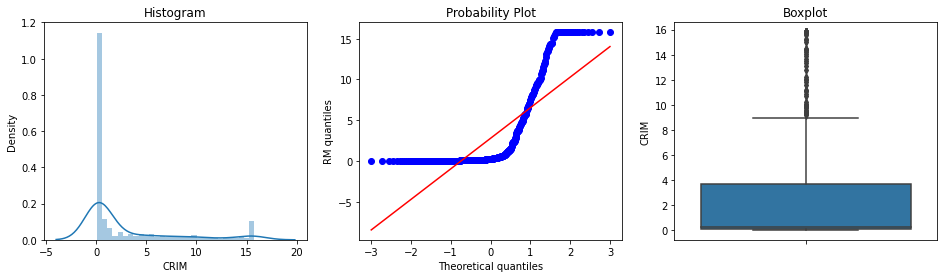

In [197]:
diagnostic_plots(boston, 'CRIM')

## Censoring with feature-engine

In [198]:
# boston.csv in local file 
boston = pd.read_csv('boston.csv')
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [200]:
# create the capper

windsorizer = Winsorizer(capping_method='gaussian', 
                          tail='both', # cap left, right or both tails 
                          variables=['RM', 'LSTAT', 'CRIM'])

windsorizer.fit(boston)

Winsorizer(tail='both', variables=['RM', 'LSTAT', 'CRIM'])

In [201]:
boston_t = windsorizer.transform(boston)

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


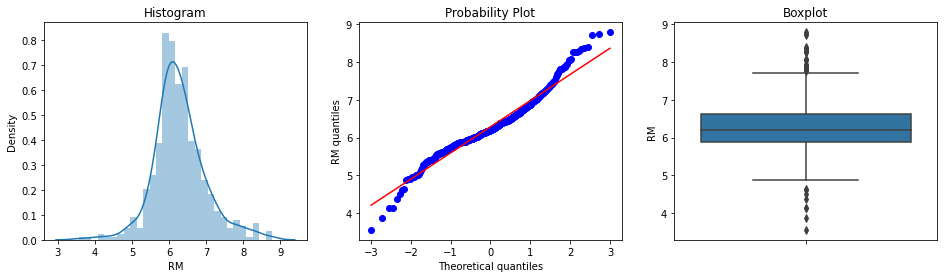

In [202]:
diagnostic_plots(boston, 'RM')

c:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


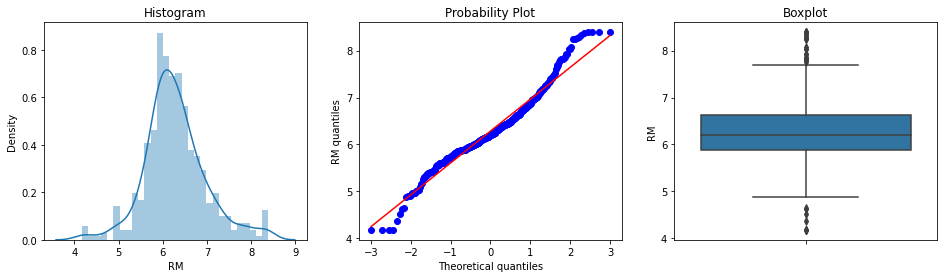

In [203]:
diagnostic_plots(boston_t, 'RM')

In [204]:
# we can inspect the minimum caps for each variable
windsorizer.left_tail_caps_

{'RM': 4.176782957105809,
 'LSTAT': -8.770121292938992,
 'CRIM': -22.19111175868521}

In [205]:
# we can inspect the maximum caps for each variable
windsorizer.right_tail_caps_

{'RM': 8.392485817597748,
 'LSTAT': 34.07624777515244,
 'CRIM': 29.41815887330972}